Import

In [43]:
import fasttext 
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
import math
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

Data

In [13]:
horror = pd.read_csv('Horror_Movies_Clean.csv')

triggers = pd.read_csv('EVERY_trigger_movies.csv')
triggers.fillna(0, inplace = True)
triggers = triggers.apply(lambda col: col.astype(int) if col.dtype in ['float64', 'float32'] else col)
triggers = triggers.replace({1: True, 0: False})

merged = pd.merge(horror, triggers, left_on = 'Name', right_on = 'Movie')
merged = merged.dropna(subset=['Date'])

merged['Date'] = merged['Date'].astype(int)

/var/folders/tx/k03ny59x1j70p8svzg_91jnh0000gn/T/ipykernel_33906/1204610059.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  triggers = triggers.replace({1: True, 0: False})


In [14]:
print('Number of movies in horror dataset :', len(horror))
print('Number of movies in trigger dataset :', len(triggers))
print('Number of common movies :',len(merged))

Number of movies in horror dataset : 34955
Number of movies in trigger dataset : 49803
Number of common movies : 10226


## Analysis of the whole dataset

In [36]:
custom_palette = [
    "#ff6f00",  # Orange ajusté
    "#fc8c02",  # Orange différent
    "#e000ff",  # Magenta ajusté
    "#a302ff",  # Violet ajusté
    "#1a1a1a",  # Noir adouci (gris foncé)
    "#00b3ff",  # Cyan vif
    "#f5e942",  # Jaune éclatant
    "#4cff00",  # Vert néon
    "#ff0073",  # Rose vif
    "#6a0dad",  # Violet profond
    "#ff4500",  # Rouge-orangé éclatant
    "#00ff7f",  # Vert printemps
    "#8b00ff",  # Violet
    "#ffd700",  # Or
    "#1e90ff",  # Bleu dodger
    "#ff1493",  # Rose foncé
    "#32cd32",  # Vert lime
    "#ff6347",  # Tomate
    "#40e0d0",  # Turquoise
    "#ffcccb"   # Corail clair
]



In [49]:
merged = merged.dropna(subset=['Date'])
merged = merged.replace(0, np.nan)
merged = merged[merged['Date'] > 1950]
trigger_counts = merged.groupby('Date').sum()

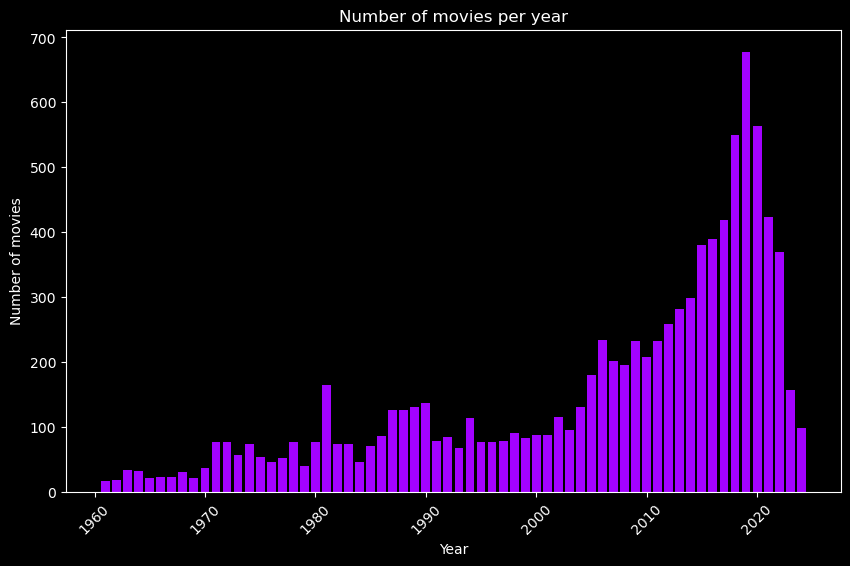

In [50]:
compte = merged.groupby('Date').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(compte['Date'], compte['count'], color=custom_palette[3])
plt.xlabel('Year')
plt.style.use('dark_background')
plt.ylabel('Number of movies')
plt.title('Number of movies per year')
plt.xticks(rotation=45)  
plt.show()

This dataset was created merging the trigger dataset found on Doesthedogdie.com, and the common horror dataset used for the rest of the analysis. This allowed us to extract the horror content of the trigger dataset.
For this part, we then use a dataset of 10 226 horror movies between 1950 and 2024.

## Global analysis of content

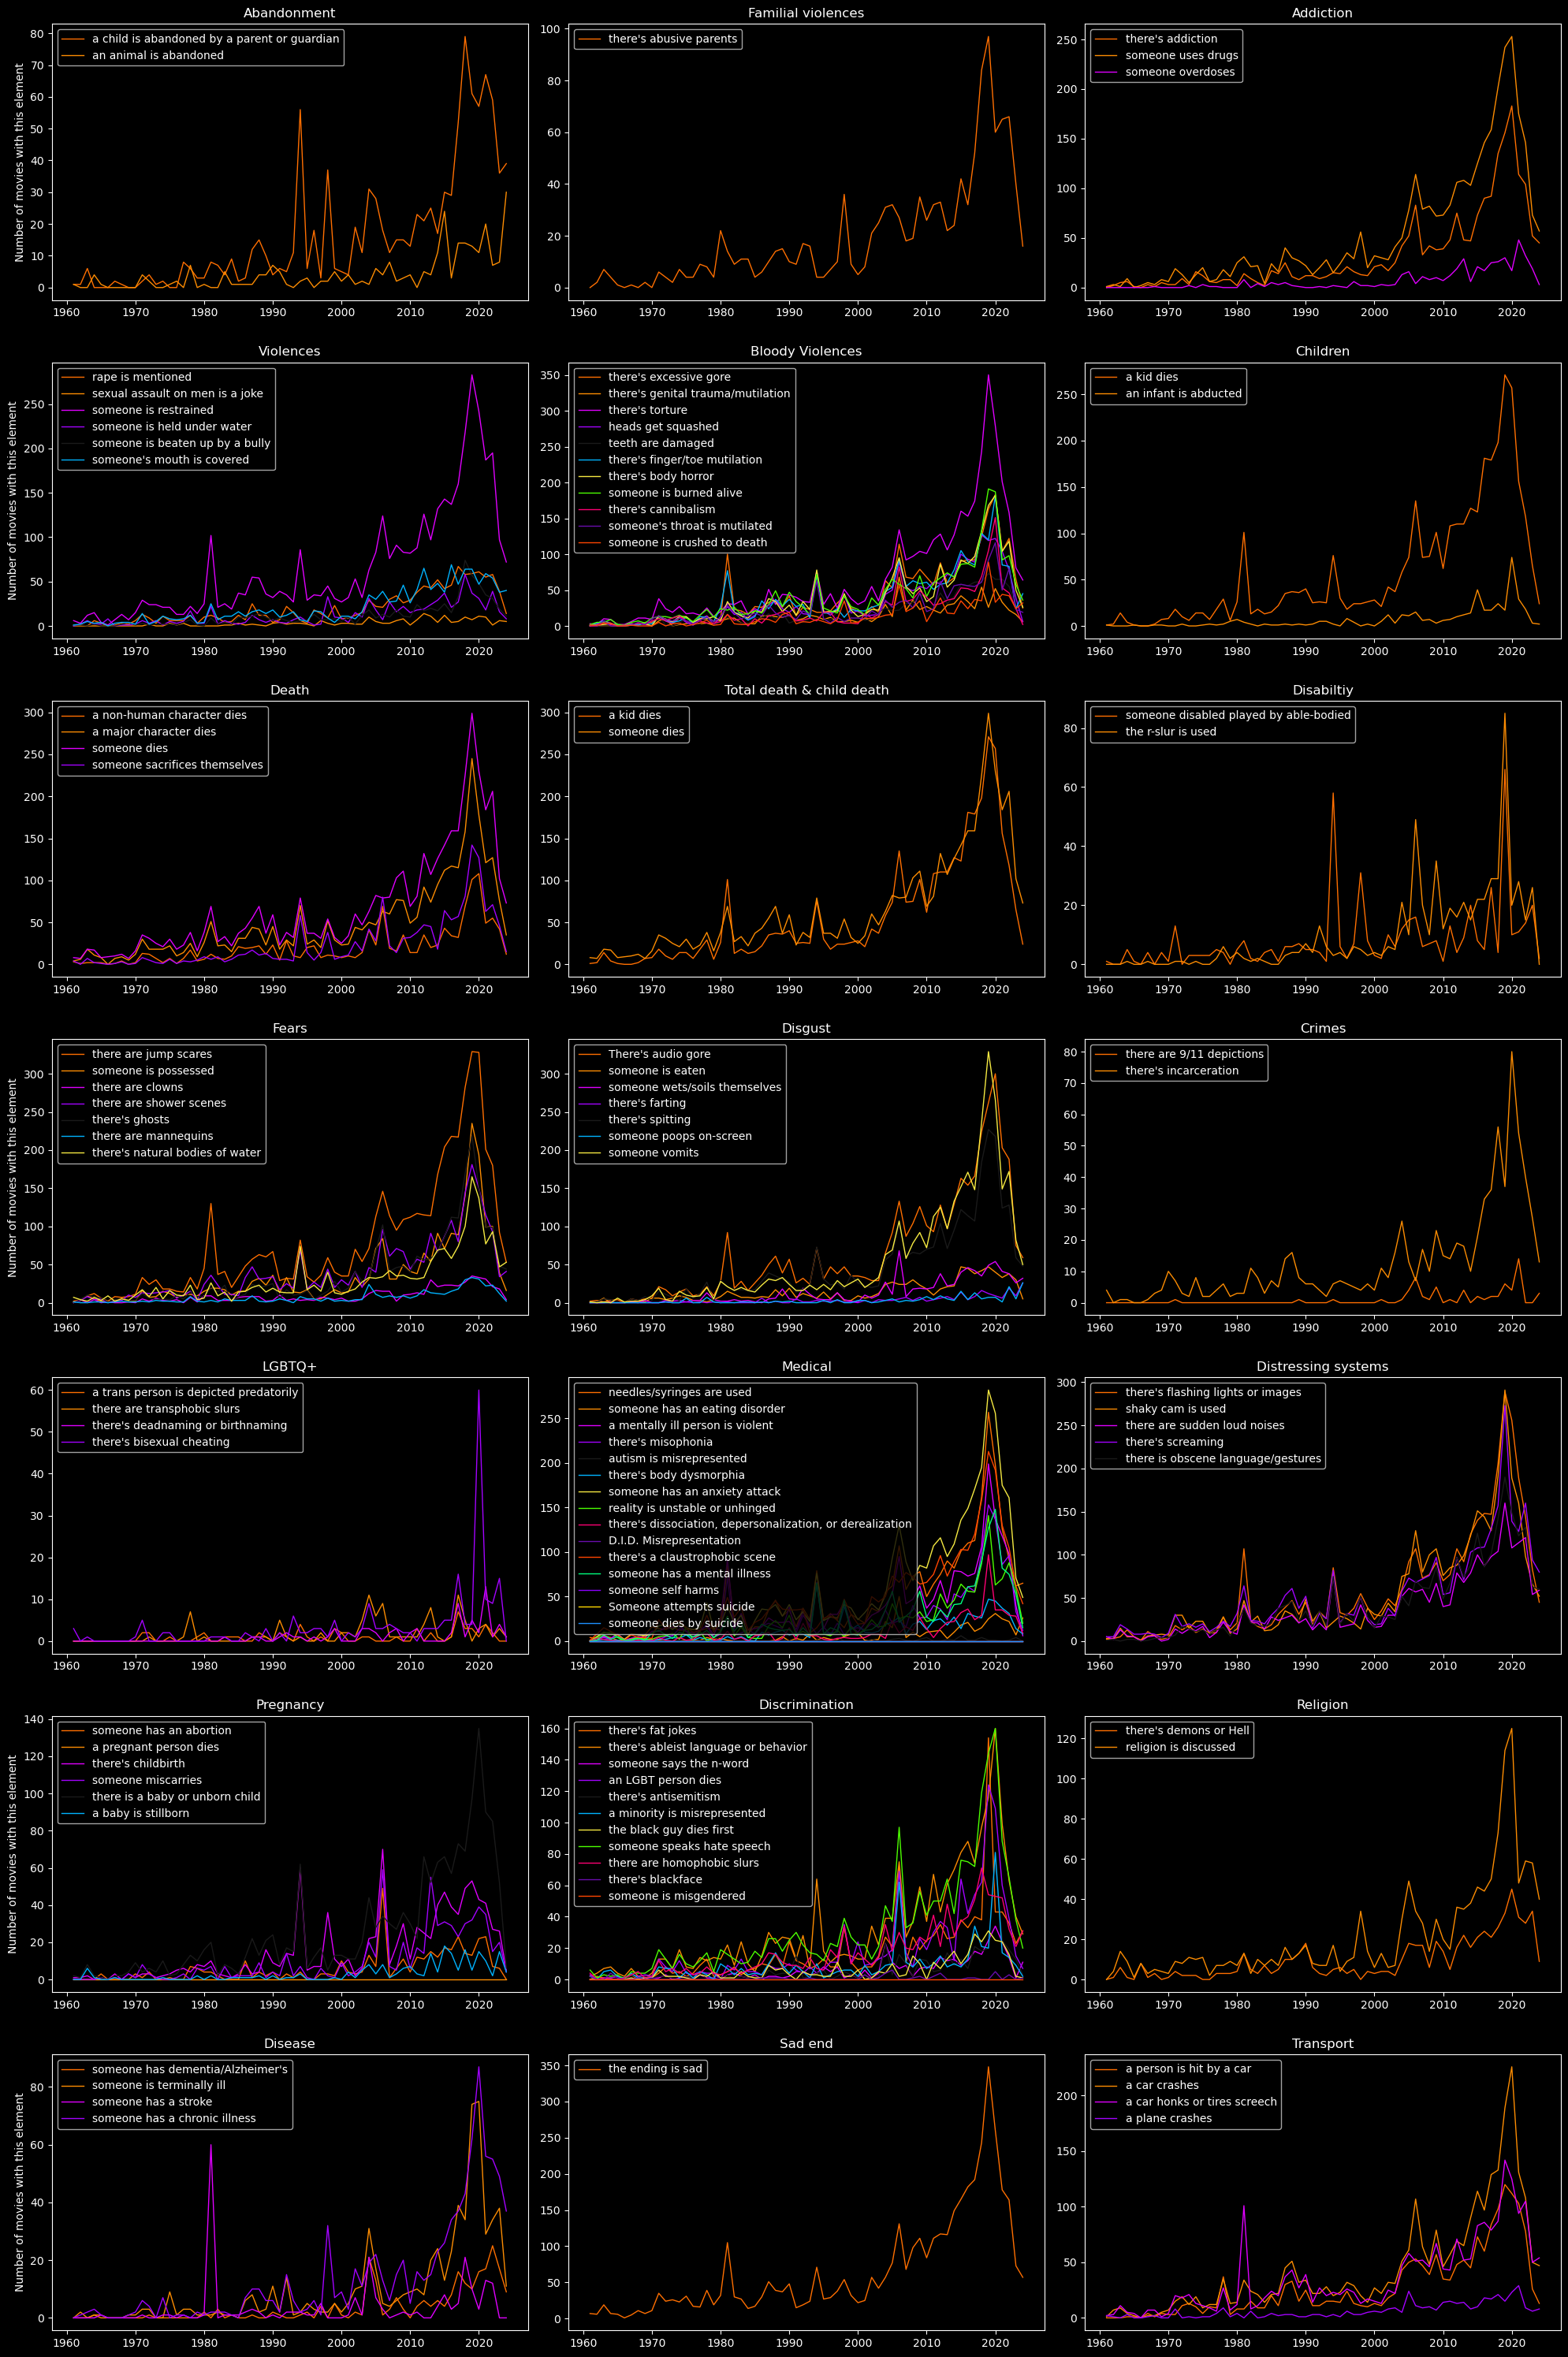

In [51]:
fig, axs = plt.subplots(7, 3, figsize=(20, 30))  
plt.style.use('dark_background')

triggers_to_plot1 = ["a child is abandoned by a parent or guardian", "an animal is abandoned"]
for i, trigger in enumerate(triggers_to_plot1):
    axs[0, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[0, 0].set_ylabel("Number of movies with this element")
axs[0, 0].set_title("Abandonment")
axs[0, 0].legend()

triggers_to_plot2 = ["there's abusive parents"]
for i, trigger in enumerate(triggers_to_plot2):
    axs[0, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[0, 1].set_title("Familial violences")
axs[0, 1].legend()

triggers_to_plot3 = ["there's addiction", "someone uses drugs", "someone overdoses"]
for i, trigger in enumerate(triggers_to_plot3):
    axs[0, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[0, 2].set_title("Addiction")
axs[0, 2].legend()

triggers_to_plot4 = ["rape is mentioned", "sexual assault on men is a joke", "someone is restrained", "someone is held under water", "someone is beaten up by a bully", "someone's mouth is covered"]
for i, trigger in enumerate(triggers_to_plot4):
    axs[1, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 0].set_ylabel("Number of movies with this element")
axs[1, 0].set_title("Violences")
axs[1, 0].legend()

triggers_to_plot5 = ["there's excessive gore", "there's genital trauma/mutilation", "there's torture", "heads get squashed", "teeth are damaged", "there's finger/toe mutilation", "there's body horror", "someone is burned alive", "there's cannibalism", "someone's throat is mutilated", "someone is crushed to death"]
for i, trigger in enumerate(triggers_to_plot5):
    axs[1, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 1].set_title("Bloody Violences")
axs[1, 1].legend()

triggers_to_plot6 = ["a kid dies", "an infant is abducted"]
for i, trigger in enumerate(triggers_to_plot6):
    axs[1, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 2].set_title("Children")
axs[1, 2].legend()

triggers_to_plot7 = ["a non-human character dies", "a major character dies", "someone dies", "someone sacrifices themselves"]
for i, trigger in enumerate(triggers_to_plot7):
    axs[2, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[2, 0].set_title("Death")
axs[2, 0].legend()

triggers_to_plot8 = ["a kid dies", "someone dies"]
for i, trigger in enumerate(triggers_to_plot8):
    axs[2, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[2, 1].set_title("Total death & child death")
axs[2, 1].legend()

triggers_to_plot9 = ["someone disabled played by able-bodied", "the r-slur is used"]
for i, trigger in enumerate(triggers_to_plot9):
    axs[2, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[2, 2].set_title("Disabiltiy")
axs[2, 2].legend()

triggers_to_plot10 = ["there are jump scares", "someone is possessed", "there are clowns", "there are shower scenes", "there's ghosts", "there are mannequins", "there's natural bodies of water"]
for i, trigger in enumerate(triggers_to_plot10):
    axs[3, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[3, 0].set_ylabel("Number of movies with this element")
axs[3, 0].set_title("Fears")
axs[3, 0].legend()

triggers_to_plot11 = ["There's audio gore", "someone is eaten", "someone wets/soils themselves", "there's farting", "there's spitting", "someone poops on-screen", "someone vomits"]
for i, trigger in enumerate(triggers_to_plot11):
    axs[3, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[3, 1].set_title("Disgust")
axs[3, 1].legend()

triggers_to_plot12 = ["there are 9/11 depictions", "there's incarceration"]
for i, trigger in enumerate(triggers_to_plot12):
    axs[3, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[3, 2].set_title("Crimes")
axs[3, 2].legend()

colonnes_interval13 = trigger_counts.loc[:, 'a trans person is depicted predatorily': "there's bisexual cheating"]
triggers_to_plot13 = colonnes_interval13.columns.tolist()
for i, trigger in enumerate(triggers_to_plot13):
    axs[4, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 0].set_ylabel("Number of movies with this element")
axs[4, 0].set_title("LGBTQ+")
axs[4, 0].legend()

triggers_to_plot14 = ["needles/syringes are used", "someone has an eating disorder", "a mentally ill person is violent", "there's misophonia", "autism is misrepresented", "there's body dysmorphia", "someone has an anxiety attack", "reality is unstable or unhinged", "there's dissociation, depersonalization, or derealization", "D.I.D. Misrepresentation", "there's a claustrophobic scene", "someone has a mental illness", "someone self harms", "Someone attempts suicide", "someone dies by suicide"]
for i, trigger in enumerate(triggers_to_plot14):
    axs[4, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[4, 1].set_title("Medical")
axs[4, 1].legend()

triggers_to_plot15 = ["there's flashing lights or images", "shaky cam is used", "there are sudden loud noises", "there's screaming", "there is obscene language/gestures"]
for i, trigger in enumerate(triggers_to_plot15):
    axs[4, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[4, 2].set_title("Distressing systems")
axs[4, 2].legend()

triggers_to_plot16 = ["someone has an abortion", "a pregnant person dies", "there's childbirth", "someone miscarries", "there is a baby or unborn child", "a baby is stillborn"]
for i, trigger in enumerate(triggers_to_plot16):
    axs[5, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[5, 0].set_ylabel("Number of movies with this element")
axs[5, 0].set_title("Pregnancy")
axs[5, 0].legend()

triggers_to_plot17 = ["there's fat jokes", "there's ableist language or behavior", "someone says the n-word", "an LGBT person dies", "there's antisemitism", "a minority is misrepresented", "the black guy dies first", "someone speaks hate speech", "there are homophobic slurs", "there's blackface","someone is misgendered"]
for i, trigger in enumerate(triggers_to_plot17):
    axs[5, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[5, 1].set_title("Discrimination")
axs[5, 1].legend()

triggers_to_plot18 = ["there's demons or Hell", "religion is discussed"]
for i, trigger in enumerate(triggers_to_plot18):
    axs[5, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[5, 2].set_title("Religion")
axs[5, 2].legend()

triggers_to_plot19 = ["someone has dementia/Alzheimer's", "someone is terminally ill", "someone has a stroke", "someone has a chronic illness"]
for i, trigger in enumerate(triggers_to_plot19):
    axs[6, 0].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[6, 0].set_ylabel("Number of movies with this element")
axs[6, 0].set_title("Disease")
axs[6, 0].legend()

triggers_to_plot20 = ["the ending is sad"]
for i, trigger in enumerate(triggers_to_plot20):
    axs[6, 1].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[6, 1].set_title("Sad end")
axs[6, 1].legend()

triggers_to_plot21 = ["a person is hit by a car", "a car crashes", "a car honks or tires screech", "a plane crashes"]
for i, trigger in enumerate(triggers_to_plot21):
    axs[6, 2].plot(trigger_counts.index, trigger_counts[trigger], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[6, 2].set_title("Transport")
axs[6, 2].legend()

plt.tight_layout()
plt.show()

Here we visualize the number of movies per year that contain specific content. This allows us to compare the apparition of different triggers. Unfortunately, the apparition of each content follows the global repartition of movies per year. To get rid of this bias, we try again but after a standardization (the number of movies with a content is now divided by the total number of movies the same year).

### Standardization

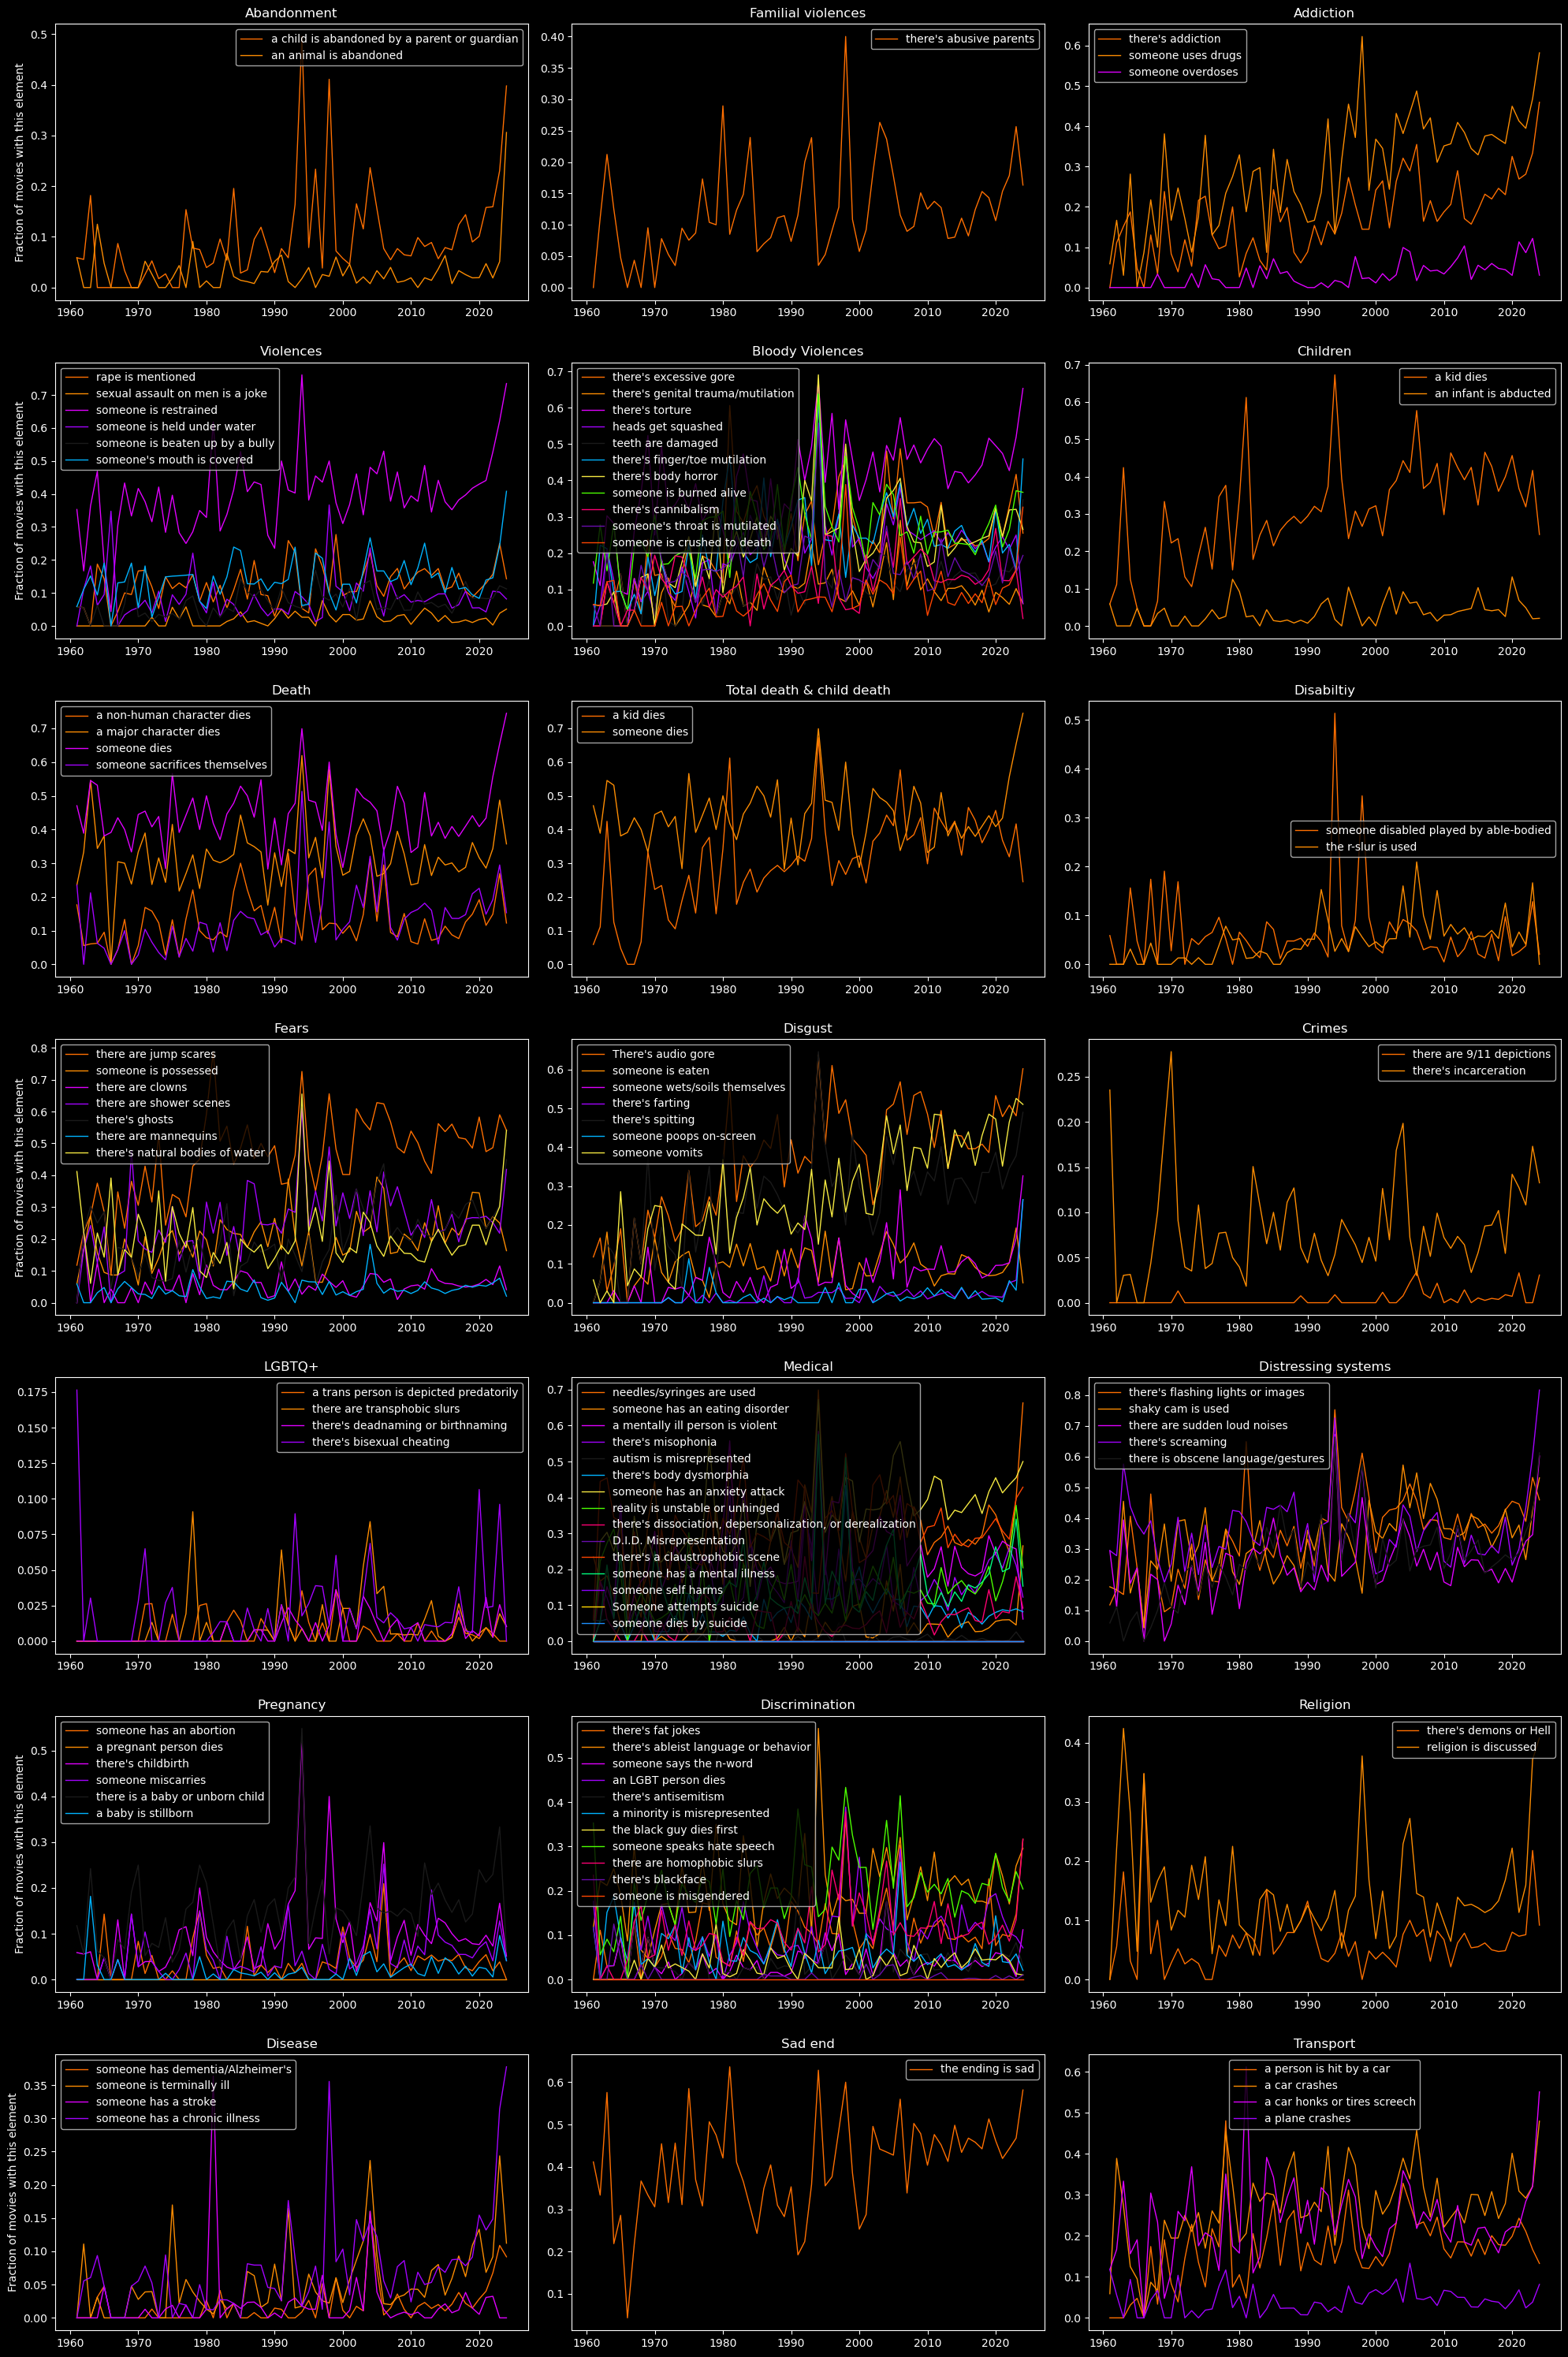

In [52]:
fig, axs = plt.subplots(7, 3, figsize=(20, 30))  
plt.style.use('dark_background')

triggers_to_plot1 = ["a child is abandoned by a parent or guardian", "an animal is abandoned"]
for i, trigger in enumerate(triggers_to_plot1):
    axs[0, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[0, 0].set_ylabel("Fraction of movies with this element")
axs[0, 0].set_title("Abandonment")
axs[0, 0].legend()

triggers_to_plot2 = ["there's abusive parents"]
for i, trigger in enumerate(triggers_to_plot2):
    axs[0, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[0, 1].set_title("Familial violences")
axs[0, 1].legend()

triggers_to_plot3 = ["there's addiction", "someone uses drugs", "someone overdoses"]
for i, trigger in enumerate(triggers_to_plot3):
    axs[0, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[0, 2].set_title("Addiction")
axs[0, 2].legend()

triggers_to_plot4 = ["rape is mentioned", "sexual assault on men is a joke", "someone is restrained", "someone is held under water", "someone is beaten up by a bully", "someone's mouth is covered"]
for i, trigger in enumerate(triggers_to_plot4):
    axs[1, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 0].set_ylabel("Fraction of movies with this element")
axs[1, 0].set_title("Violences")
axs[1, 0].legend()

triggers_to_plot5 = ["there's excessive gore", "there's genital trauma/mutilation", "there's torture", "heads get squashed", "teeth are damaged", "there's finger/toe mutilation", "there's body horror", "someone is burned alive", "there's cannibalism", "someone's throat is mutilated", "someone is crushed to death"]
for i, trigger in enumerate(triggers_to_plot5):
    axs[1, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 1].set_title("Bloody Violences")
axs[1, 1].legend()

triggers_to_plot6 = ["a kid dies", "an infant is abducted"]
for i, trigger in enumerate(triggers_to_plot6):
    axs[1, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 2].set_title("Children")
axs[1, 2].legend()

triggers_to_plot7 = ["a non-human character dies", "a major character dies", "someone dies", "someone sacrifices themselves"]
for i, trigger in enumerate(triggers_to_plot7):
    axs[2, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[2, 0].set_title("Death")
axs[2, 0].legend()

triggers_to_plot8 = ["a kid dies", "someone dies"]
for i, trigger in enumerate(triggers_to_plot8):
    axs[2, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[2, 1].set_title("Total death & child death")
axs[2, 1].legend()

triggers_to_plot9 = ["someone disabled played by able-bodied", "the r-slur is used"]
for i, trigger in enumerate(triggers_to_plot9):
    axs[2, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[2, 2].set_title("Disabiltiy")
axs[2, 2].legend()

triggers_to_plot10 = ["there are jump scares", "someone is possessed", "there are clowns", "there are shower scenes", "there's ghosts", "there are mannequins", "there's natural bodies of water"]
for i, trigger in enumerate(triggers_to_plot10):
    axs[3, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[3, 0].set_ylabel("Fraction of movies with this element")
axs[3, 0].set_title("Fears")
axs[3, 0].legend()

triggers_to_plot11 = ["There's audio gore", "someone is eaten", "someone wets/soils themselves", "there's farting", "there's spitting", "someone poops on-screen", "someone vomits"]
for i, trigger in enumerate(triggers_to_plot11):
    axs[3, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[3, 1].set_title("Disgust")
axs[3, 1].legend()

triggers_to_plot12 = ["there are 9/11 depictions", "there's incarceration"]
for i, trigger in enumerate(triggers_to_plot12):
    axs[3, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[3, 2].set_title("Crimes")
axs[3, 2].legend()

colonnes_interval13 = trigger_counts.loc[:, 'a trans person is depicted predatorily': "there's bisexual cheating"]
triggers_to_plot13 = colonnes_interval13.columns.tolist()
for i, trigger in enumerate(triggers_to_plot13):
    axs[4, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[1, 0].set_ylabel("Fraction of movies with this element")
axs[4, 0].set_title("LGBTQ+")
axs[4, 0].legend()

triggers_to_plot14 = ["needles/syringes are used", "someone has an eating disorder", "a mentally ill person is violent", "there's misophonia", "autism is misrepresented", "there's body dysmorphia", "someone has an anxiety attack", "reality is unstable or unhinged", "there's dissociation, depersonalization, or derealization", "D.I.D. Misrepresentation", "there's a claustrophobic scene", "someone has a mental illness", "someone self harms", "Someone attempts suicide", "someone dies by suicide"]
for i, trigger in enumerate(triggers_to_plot14):
    axs[4, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[4, 1].set_title("Medical")
axs[4, 1].legend()

triggers_to_plot15 = ["there's flashing lights or images", "shaky cam is used", "there are sudden loud noises", "there's screaming", "there is obscene language/gestures"]
for i, trigger in enumerate(triggers_to_plot15):
    axs[4, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[4, 2].set_title("Distressing systems")
axs[4, 2].legend()

triggers_to_plot16 = ["someone has an abortion", "a pregnant person dies", "there's childbirth", "someone miscarries", "there is a baby or unborn child", "a baby is stillborn"]
for i, trigger in enumerate(triggers_to_plot16):
    axs[5, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[5, 0].set_ylabel("Fraction of movies with this element")
axs[5, 0].set_title("Pregnancy")
axs[5, 0].legend()

triggers_to_plot17 = ["there's fat jokes", "there's ableist language or behavior", "someone says the n-word", "an LGBT person dies", "there's antisemitism", "a minority is misrepresented", "the black guy dies first", "someone speaks hate speech", "there are homophobic slurs", "there's blackface","someone is misgendered"]
for i, trigger in enumerate(triggers_to_plot17):
    axs[5, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[5, 1].set_title("Discrimination")
axs[5, 1].legend()

triggers_to_plot18 = ["there's demons or Hell", "religion is discussed"]
for i, trigger in enumerate(triggers_to_plot18):
    axs[5, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[5, 2].set_title("Religion")
axs[5, 2].legend()

triggers_to_plot19 = ["someone has dementia/Alzheimer's", "someone is terminally ill", "someone has a stroke", "someone has a chronic illness"]
for i, trigger in enumerate(triggers_to_plot19):
    axs[6, 0].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[6, 0].set_ylabel("Fraction of movies with this element")
axs[6, 0].set_title("Disease")
axs[6, 0].legend()

triggers_to_plot20 = ["the ending is sad"]
for i, trigger in enumerate(triggers_to_plot20):
    axs[6, 1].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[6, 1].set_title("Sad end")
axs[6, 1].legend()

triggers_to_plot21 = ["a person is hit by a car", "a car crashes", "a car honks or tires screech", "a plane crashes"]
for i, trigger in enumerate(triggers_to_plot21):
    axs[6, 2].plot(trigger_counts.index, trigger_counts[trigger].values /compte['count'], label=trigger, linewidth = 1, color = custom_palette[i]) 
axs[6, 2].set_title("Transport")
axs[6, 2].legend()

plt.tight_layout()
plt.show()

Now we can visualize the fraction of movies per year that contains each content. This is a better way to compare if some triggers appear more often than others, and when. 
We can already make some small observations. For example : let's look at the 'Total death vs Child death' graph. We can see that before 1900, there were more general death than child death. After this date, the two curves cross each other, showing that the children are more and more among the persons that will die in a movie. 
On the 'Children' graph, we can see that common 'horror' movies present more child death than abduction. While abduction is a terrifying subject, we could imagine that abductions happen more in 'action' movies (like Taken), while horror movies focus on more radical ends. 

Now, can we find a correlation between each content? To do that, it is better to use some metrics.

### Study of the correlation for some of the features

In [53]:
df_boolean = merged.select_dtypes(include=[bool]).astype(int)

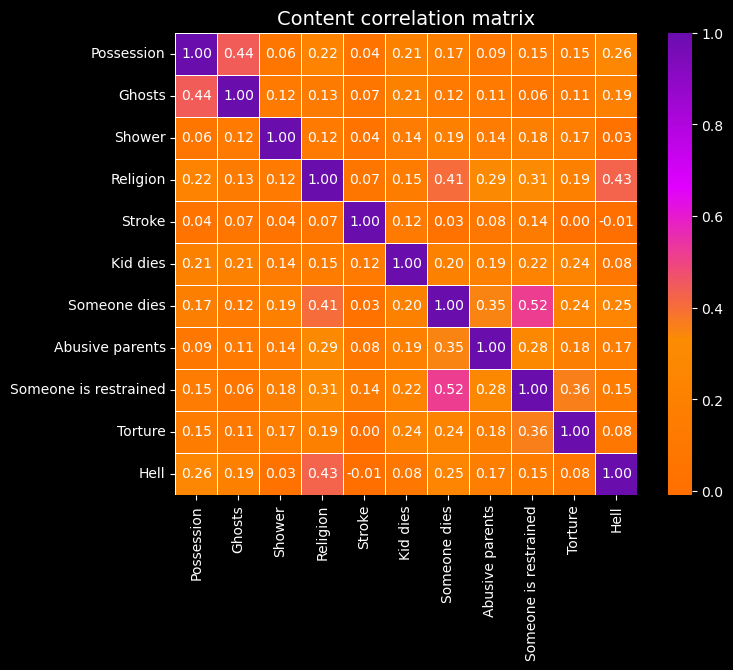

In [54]:
df = pd.DataFrame({
    'Possession': merged["someone is possessed"],
    'Ghosts':merged["there's ghosts"] ,
    'Shower': merged["there are shower scenes"] ,
    'Religion': merged['religion is discussed'],
    'Stroke': merged['someone has a stroke'],
    'Kid dies': merged['a kid dies'] ,
    'Someone dies': merged['someone dies'],
    'Abusive parents': merged["there's abusive parents"],
    'Someone is restrained': merged["someone is restrained"],
    'Torture': merged["there's torture"] ,
    'Hell': merged["there's demons or Hell"] 
    })

correlation_matrix = df.corr()

colors = ["#ff6f00", "#fc8c02", "#e000ff", "#6a0dad"]
custom_cmap = LinearSegmentedColormap.from_list("orange_to_violet", colors)

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap,
            cbar=True, square=True, linewidths=0.5, annot_kws={"size": 10})
plt.title("Content correlation matrix", fontsize=14)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.show()


Here is a correlation matrix between some content that were analyzed before (not all of them, this is an example). In this matrix, we analyse the correlation of apparition between two triggers in the same movie. 
Some observations make a lot of sense! For example: Ghost and Possession seem to have a positive correlation (their correlation coefficient is positive). Religion and Hell also seem to go together! 'Someone is restrained' and torture also show a correlation (We could think of the movies 'Saw' for example), and 'Someone is restrained' and Death too. Death and religion also seem to have some common points. 

This kind of analysis can be extended for the +200 triggers of the dataset.



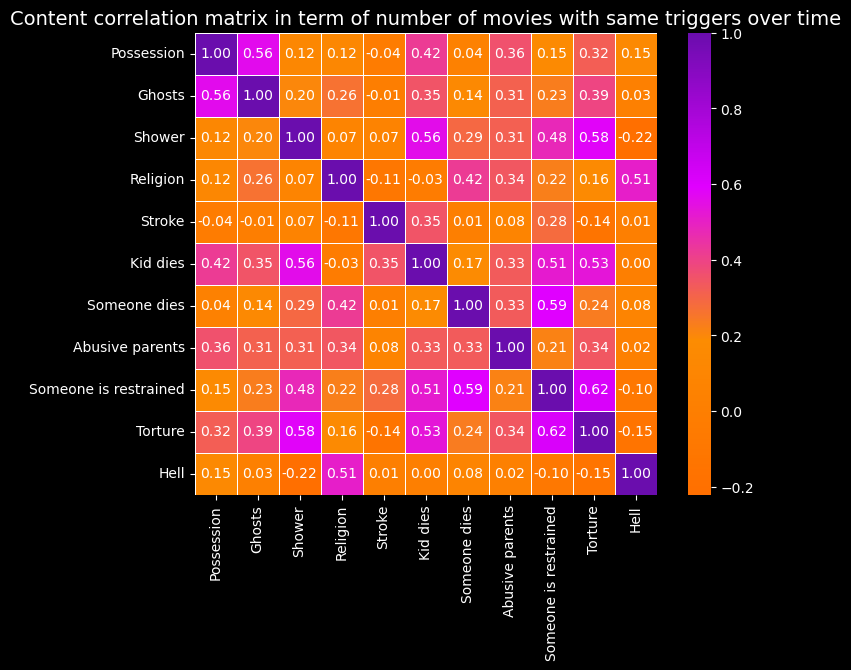

In [55]:
df = pd.DataFrame({
    'Possession': trigger_counts["someone is possessed"].values / compte['count'],
    'Ghosts': trigger_counts["there's ghosts"].values / compte['count'],
    'Shower': trigger_counts["there are shower scenes"].values / compte['count'],
    'Religion': trigger_counts['religion is discussed'].values / compte['count'],
    'Stroke': trigger_counts['someone has a stroke'].values / compte['count'],
    'Kid dies': trigger_counts['a kid dies'].values / compte['count'],
    'Someone dies': trigger_counts['someone dies'].values / compte['count'],
    'Abusive parents': trigger_counts["there's abusive parents"].values / compte['count'],
    'Someone is restrained': trigger_counts["someone is restrained"].values / compte['count'],
    'Torture': trigger_counts["there's torture"].values / compte['count'],
    'Hell': trigger_counts["there's demons or Hell"].values / compte['count']
    })

correlation_matrix = df.corr()

colors = ["#ff6f00", "#fc8c02", "#e000ff", "#6a0dad"]
custom_cmap = LinearSegmentedColormap.from_list("orange_to_violet", colors)

plt.figure(figsize=(8, 6))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap,
            cbar=True, square=True, linewidths=0.5, annot_kws={"size": 10})
plt.title("Content correlation matrix in term of number of movies with same triggers over time", fontsize=14)
plt.xticks(rotation=90)  # Rotation des labels des axes x
plt.yticks(rotation=0)   # Rotation des labels des axes y
plt.show()


Here is another way to check the correlation of each trigger. This time, we do not analyse their apparition in the same movies, but only their general timeline distribution over the year (as presented on the first graphs). The values are standardized to minimize the impact of the general movie distribution. The correlation values are higher because it doesn't need to take in account the apparition of two elements in the same movies, so it is less precise. 

## Analysis of content repartition

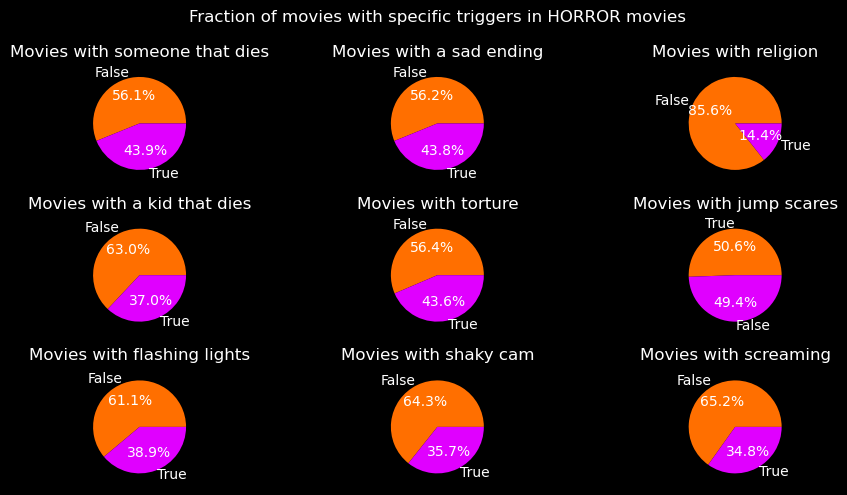

In [67]:
colors = ["#ff6f00", "#e000ff"]

fix, axs = plt.subplots(3,3, figsize = (10,5))

merged['someone dies'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[0, 0], ylabel = '')
axs[0,0].set_title('Movies with someone that dies')

merged['the ending is sad'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[0,1], ylabel = '')
axs[0,1].set_title('Movies with a sad ending')

merged['religion is discussed'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[0,2], ylabel = '')
axs[0,2].set_title('Movies with religion')

merged['a kid dies'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[1,0], ylabel = '')
axs[1,0].set_title('Movies with a kid that dies')

merged["there's torture"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[1,1], ylabel = '')
axs[1,1].set_title('Movies with torture')

merged["there are jump scares"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[1,2], ylabel = '')
axs[1,2].set_title('Movies with jump scares')

merged["there's flashing lights or images"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[2,0], ylabel = '')
axs[2,0].set_title('Movies with flashing lights')

merged["shaky cam is used"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[2,1], ylabel = '')
axs[2,1].set_title('Movies with shaky cam')

merged["there's screaming"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, ax = axs[2,2], ylabel = '')
axs[2,2].set_title('Movies with screaming')

plt.suptitle('Fraction of movies with specific triggers in HORROR movies')
plt.tight_layout()
plt.show()


Let's analyse some triggers one by one now. How often do they appear? Pie charts are very practical for that. Among 10 000 horror movies, almost half of them use jump scares! How original... And could you think about an other movie genre where 43.8% percent of them have a sad end? That's very specific to horror movies! But to be sure about it, we could plot the fraction of apparition of triggers for all the movies in the trigger dataset (that contains 49 803 movies of different genres).

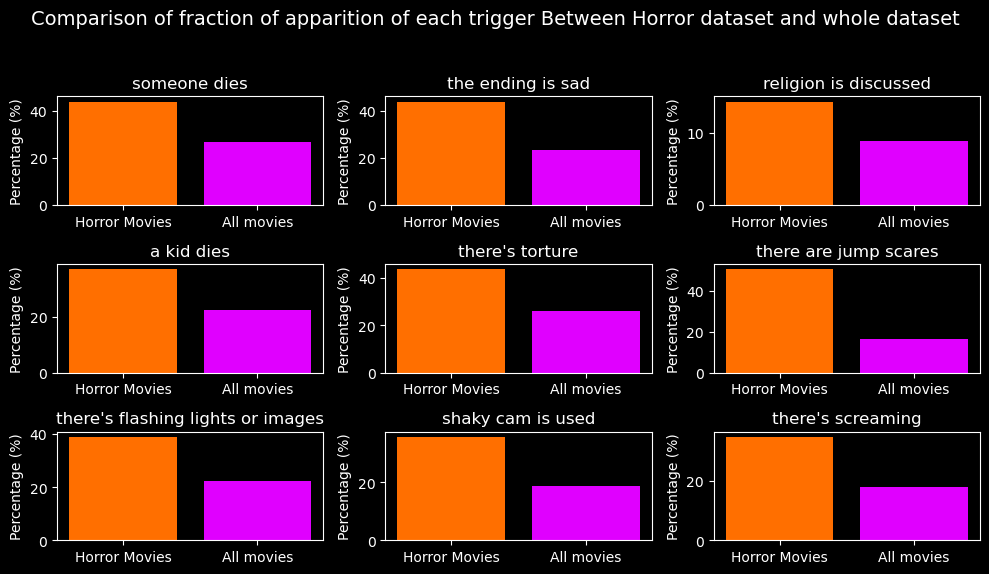

In [72]:
triggers_list = ['someone dies', 'the ending is sad', 'religion is discussed', 'a kid dies',
    "there's torture", 'there are jump scares', "there's flashing lights or images",
    'shaky cam is used', "there's screaming"]

fig, axs = plt.subplots(3, 3, figsize=(10, 6))
colors = ["#ff6f00", "#e000ff"] 

for i, trigger in enumerate(triggers_list):
    row, col = divmod(i, 3)
    percent_true_merged = (merged[trigger].value_counts(normalize=True).get(True, 0) * 100)
    percent_true_triggers = (triggers[trigger].value_counts(normalize=True).get(True, 0) * 100)
    
    axs[row, col].bar(['Horror Movies', 'All movies'], [percent_true_merged, percent_true_triggers], color=colors)
    axs[row, col].set_title(trigger)
    axs[row, col].set_ylabel("Percentage (%)")

plt.suptitle('Comparison of fraction of apparition of each trigger Between Horror dataset and whole dataset', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Now we compare the fraction of apparition of each content in the 10 000 horror movies, and then in the 49 803 movies of the trigger dataset. It is very clear that sad ending happen more often in horror movies than in other genres! Like other contents that seem very specific to horror movies.